<a href="https://colab.research.google.com/github/kapibara3chi/ReinforcementLearning/blob/main/ReinfoecementLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# simple Sample

## pip

In [32]:
!pip install gym-anytrading
!pip install yfinance

## code

[*********************100%%**********************]  1 of 1 completed


                 Open       High        Low      Close  Adj Close    Volume
Date                                                                       
2023-01-03  63.029999  64.040001  59.880001  61.360001  60.427792  18048500
2023-01-04  62.439999  63.750000  60.900002  62.709999  61.757278  17139400
2023-01-05  61.689999  61.740002  60.250000  60.529999  59.610405  15680900
2023-01-06  62.049999  65.220001  60.529999  64.639999  63.657963  18489900
2023-01-09  65.800003  67.449997  64.440002  64.559998  63.579174  11824200
info:{'total_reward': 0.0, 'total_profit': 1.0, 'position': <Positions.Long: 1>}
info:{'total_reward': 0.0, 'total_profit': 1.0, 'position': <Positions.Long: 1>}
info:{'total_reward': 0.0, 'total_profit': 1.0, 'position': <Positions.Long: 1>}
info:{'total_reward': 5.700004577636719, 'total_profit': 1.0718721689837203, 'position': <Positions.Short: 0>}
info:{'total_reward': 5.700004577636719, 'total_profit': 1.0718721689837203, 'position': <Positions.Short: 0>}
inf

/usr/local/lib/python3.10/dist-packages/gymnasium/core.py:311: UserWarning: WARN: env.render_all to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.render_all` for environment variables or `env.get_wrapper_attr('render_all')` that will search the reminding wrappers.
  logger.warn(


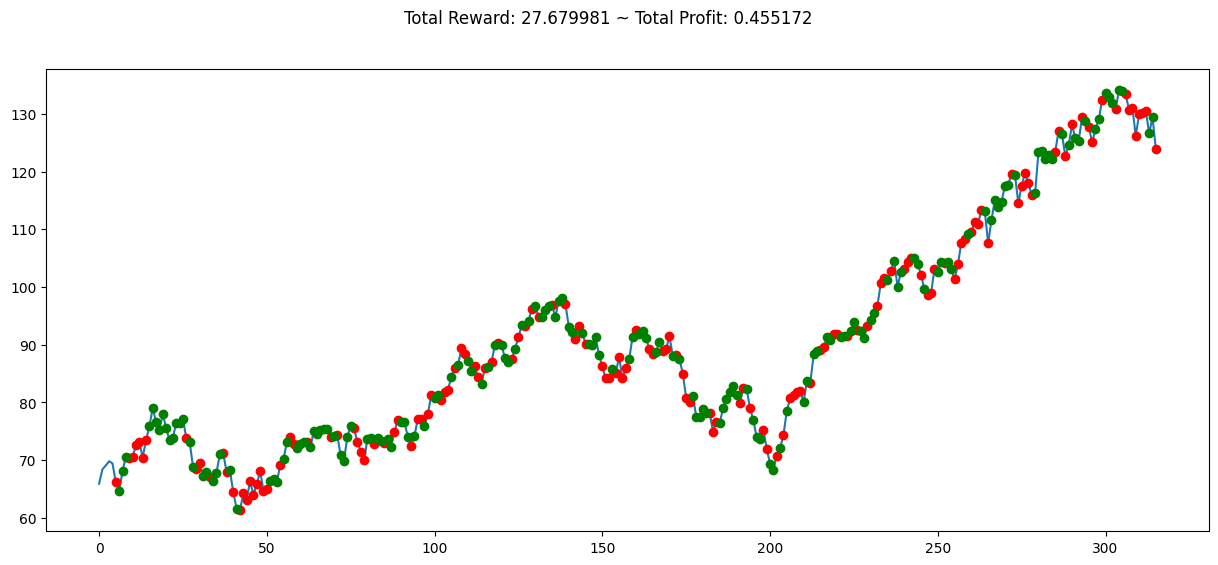

In [54]:
%matplotlib inline
import gym
import gym_anytrading
import gymnasium as gym
from gym_anytrading.envs import StocksEnv

import matplotlib.pyplot as plt

class CustomStocksEnv(StocksEnv):
    def render_all(self):
        # 凡例とマーカーサイズの調整を含むプロットを作成
        plt.figure(figsize=(15, 6))
        super().render_all()
        plt.legend(['Price', 'Buy', 'Sell'], markerscale=0.5)  # 凡例を追加
        plt.setp(plt.gca().get_lines(), markersize=4)  # マーカーサイズを調整


# 他にもデータ処理や可視化のために必要なライブラリをインポートします
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import yfinance as yf
from datetime import datetime

# CSVファイルから株価データを読み込みます
df = yf.download("SPXL",start='2023-01-01',end = datetime.now(),interval="1d")
print(df.head())

# `gym-anytrading`に必要なカラム名に変更します
# df['Date'] = pd.to_datetime(df['Date'])
# df.set_index('Date', inplace=True)

# Forex環境を構築しますが、株価予測にも同様に適用できます
# env = CustomStocksEnv(df=df, frame_bound=(10, len(df)), window_size=5)
env = gym.make('stocks-v0', df=df, frame_bound=(10, len(df)), window_size=5)


state = env.reset()
# 取引情報を格納するリストを初期化
trades = []

while True:
    action = env.action_space.sample()  # ランダムな行動を選択
    next_state, reward, terminated, truncated, info = env.step(action)
    # print(f'next state:{next_state}')
    # print(f'reward:{reward}')
    # print(f'terminated:{terminated}')
    # print(f'truncated:{truncated}')
    print(f'info:{info}')
    if terminated or truncated:
        print("Info:", info)
        break
    if 'totalｇ_reward' in info:
      trades.append(info)

print(f"trades:{trades}")
plt.figure(figsize=(15, 6))
plt.cla()
env.render_all()
plt.show()



### test

[*********************100%%**********************]  1 of 1 completed


                 Open       High        Low      Close  Adj Close    Volume
Date                                                                       
2023-01-03  63.029999  64.040001  59.880001  61.360001  60.427795  18048500
2023-01-04  62.439999  63.750000  60.900002  62.709999  61.757286  17139400
2023-01-05  61.689999  61.740002  60.250000  60.529999  59.610405  15680900
2023-01-06  62.049999  65.220001  60.529999  64.639999  63.657955  18489900
2023-01-09  65.800003  67.449997  64.440002  64.559998  63.579174  11824200
エピソード開始
next state:[[69.06       0.6800003]
 [69.78       0.7200012]
 [69.42      -0.3600006]
 [66.12      -3.2999954]
 [64.67      -1.4500046]]
reward:0
terminated:False
truncated:False
info:{'total_reward': 0.0, 'total_profit': 1.0, 'position': <Positions.Long: 1>}
next state:[[69.78       0.7200012]
 [69.42      -0.3600006]
 [66.12      -3.2999954]
 [64.67      -1.4500046]
 [68.13       3.459999 ]]
reward:0
terminated:False
truncated:False
info:{'total_reward':

/usr/local/lib/python3.10/dist-packages/gymnasium/core.py:311: UserWarning: WARN: env.render_all to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.render_all` for environment variables or `env.get_wrapper_attr('render_all')` that will search the reminding wrappers.
  logger.warn(


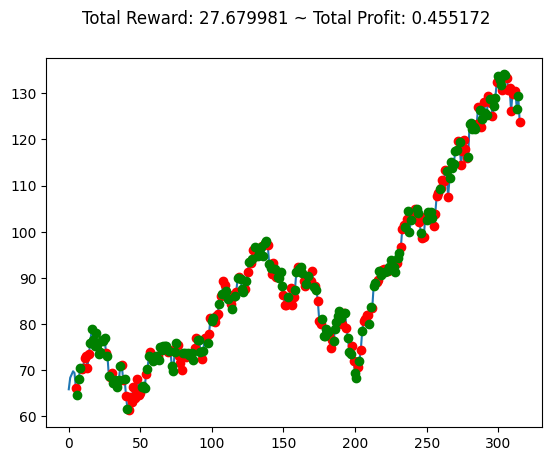

In [55]:
%matplotlib inline
import gym_anytrading
import gymnasium as gym
from gym_anytrading.envs import StocksEnv

import matplotlib.pyplot as plt

class CustomStocksEnv(StocksEnv):
    def render_all(self):
        # 凡例とマーカーサイズの調整を含むプロットを作成
        plt.figure(figsize=(15, 6))
        super().render_all()
        plt.legend(['Price', 'Buy', 'Sell'], markerscale=0.5)  # 凡例を追加
        plt.setp(plt.gca().get_lines(), markersize=4)  # マーカーサイズを調整


# 他にもデータ処理や可視化のために必要なライブラリをインポートします
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import yfinance as yf
from datetime import datetime

# CSVファイルから株価データを読み込みます
df = yf.download("SPXL",start='2023-01-01',end = datetime.now(),interval="1d")
print(df.head())

# `gym-anytrading`に必要なカラム名に変更します
# df['Date'] = pd.to_datetime(df['Date'])
# df.set_index('Date', inplace=True)

# Forex環境を構築しますが、株価予測にも同様に適用できます
# env = CustomStocksEnv(df=df, frame_bound=(10, len(df)), window_size=5)
env = gym.make('stocks-v0', df=df, frame_bound=(10, len(df)), window_size=5)

print("エピソード開始")
state = env.reset()
# 取引情報を格納するリストを初期化
trades = []
total_reward = 0  # 累積報酬を追跡するための変数

while True:
    action = env.action_space.sample()  # ランダムな行動を選択
    next_state, reward, terminated, truncated, info = env.step(action)
    total_reward += reward  # 各ステップの報酬を累積
    # print(f'next state:{next_state}')
    # print(f'reward:{reward}')
    # print(f'terminated:{terminated}')
    # print(f'truncated:{truncated}')
    # print(f'info:{info}')
    if truncated:
        print("truceted Info:", info)
        break
    if terminated :
        print("terminated Info:", info)#正常終了
        break
    if 'total_reward' in info:
      trades.append(info)

# 最終的な損益を出力
print(f"最終的な損益: {total_reward}")
# 取引の回数を出力
print(f"取引の回数: {len(trades)}")
print(f"trades:{trades}")
# plt.figure(figsize=(15, 6))
# plt.cla()
# plt.legend()
env.render_all()
plt.show()



## forex

[*********************100%%**********************]  1 of 1 completed


                 Open       High        Low      Close  Adj Close    Volume
Date                                                                       
2023-01-03  63.029999  64.040001  59.880001  61.360001  60.427799  18048500
2023-01-04  62.439999  63.750000  60.900002  62.709999  61.757282  17139400
2023-01-05  61.689999  61.740002  60.250000  60.529999  59.610401  15680900
2023-01-06  62.049999  65.220001  60.529999  64.639999  63.657963  18489900
2023-01-09  65.800003  67.449997  64.440002  64.559998  63.579178  11824200
エピソード開始
next state:[[69.06       0.6800003]
 [69.78       0.7200012]
 [69.42      -0.3600006]
 [66.12      -3.2999954]
 [64.67      -1.4500046]]
reward:47500.0
terminated:False
truncated:False
info:{'total_reward': 47500.0, 'total_profit': 1.0734451853174911, 'position': <Positions.Long: 1>}
next state:[[69.78       0.7200012]
 [69.42      -0.3600006]
 [66.12      -3.2999954]
 [64.67      -1.4500046]
 [68.13       3.459999 ]]
reward:0
terminated:False
truncated:Fa

/usr/local/lib/python3.10/dist-packages/gymnasium/core.py:311: UserWarning: WARN: env.render_all to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.render_all` for environment variables or `env.get_wrapper_attr('render_all')` that will search the reminding wrappers.
  logger.warn(


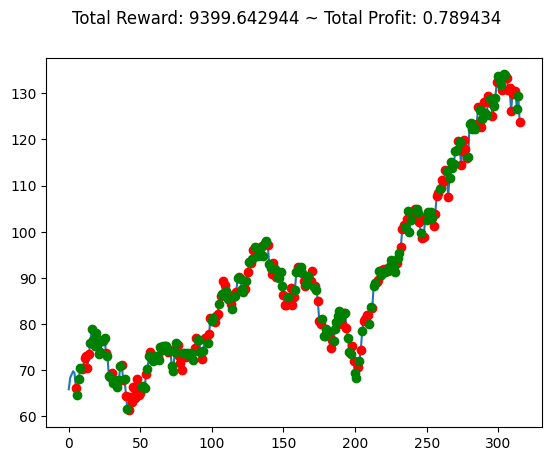

In [56]:
%matplotlib inline
import gym_anytrading
import gymnasium as gym
from gym_anytrading.envs import StocksEnv

import matplotlib.pyplot as plt

class CustomStocksEnv(StocksEnv):
    def render_all(self):
        # 凡例とマーカーサイズの調整を含むプロットを作成
        plt.figure(figsize=(15, 6))
        super().render_all()
        plt.legend(['Price', 'Buy', 'Sell'], markerscale=0.5)  # 凡例を追加
        plt.setp(plt.gca().get_lines(), markersize=4)  # マーカーサイズを調整


# 他にもデータ処理や可視化のために必要なライブラリをインポートします
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import yfinance as yf
from datetime import datetime

# CSVファイルから株価データを読み込みます
df = yf.download("SPXL",start='2023-01-01',end = datetime.now(),interval="1d")
print(df.head())

# `gym-anytrading`に必要なカラム名に変更します
# df['Date'] = pd.to_datetime(df['Date'])
# df.set_index('Date', inplace=True)

# Forex環境を構築しますが、株価予測にも同様に適用できます
# env = CustomStocksEnv(df=df, frame_bound=(10, len(df)), window_size=5)
env = gym.make('forex-v0', df=df, frame_bound=(10, len(df)), window_size=5)

print("エピソード開始")
state = env.reset()
# 取引情報を格納するリストを初期化
trades = []
total_reward = 0  # 累積報酬を追跡するための変数

while True:
    action = env.action_space.sample()  # ランダムな行動を選択
    next_state, reward, terminated, truncated, info = env.step(action)
    total_reward += reward  # 各ステップの報酬を累積
    print(f'next state:{next_state}')
    print(f'reward:{reward}')
    print(f'terminated:{terminated}')
    print(f'truncated:{truncated}')
    print(f'info:{info}')
    if truncated:
        print("truceted Info:", info)
        break
    if terminated :
        print("terminated Info:", info)#正常終了
        break
    if 'total_reward' in info:
      trades.append(info)

# 最終的な損益を出力
print(f"最終的な損益: {total_reward}")
# 取引の回数を出力
print(f"取引の回数: {len(trades)}")
print(f"trades:{trades}")
# plt.figure(figsize=(15, 6))
# plt.cla()
# plt.legend()
env.render_all()
plt.show()



### 手数料の考慮

[*********************100%%**********************]  1 of 1 completed


ストリーミング出力は最後の 5000 行に切り捨てられました。
 [ 9.0900002e+01 -1.3399963e+00]
 [ 9.3230003e+01  2.3300018e+00]
 [ 9.2040001e+01 -1.1900024e+00]
 [ 9.0190002e+01 -1.8499985e+00]
 [ 9.0169998e+01 -2.0004272e-02]
 [ 8.9940002e+01 -2.2999573e-01]
 [ 9.1349998e+01  1.4099960e+00]
 [ 8.8230003e+01 -3.1199951e+00]
 [ 8.6250000e+01 -1.9800034e+00]
 [ 8.4139999e+01 -2.1100006e+00]
 [ 8.4150002e+01  1.0002136e-02]
 [ 8.5839996e+01  1.6899948e+00]
 [ 8.5059998e+01 -7.7999878e-01]
 [ 8.7870003e+01  2.8100052e+00]
 [ 8.4220001e+01 -3.6500015e+00]
 [ 8.5930000e+01  1.7099991e+00]
 [ 8.7459999e+01  1.5299988e+00]
 [ 9.1269997e+01  3.8099976e+00]
 [ 9.2470001e+01  1.2000046e+00]
 [ 9.1910004e+01 -5.5999756e-01]
 [ 9.2370003e+01  4.5999908e-01]
 [ 9.1139999e+01 -1.2300034e+00]
 [ 8.9290001e+01 -1.8499985e+00]
 [ 8.8330002e+01 -9.5999908e-01]
 [ 8.8720001e+01  3.8999939e-01]
 [ 9.0440002e+01  1.7200012e+00]
 [ 8.8910004e+01 -1.5299988e+00]
 [ 8.9250000e+01  3.3999634e-01]]
reward:0
terminated:False
truncated:False
i

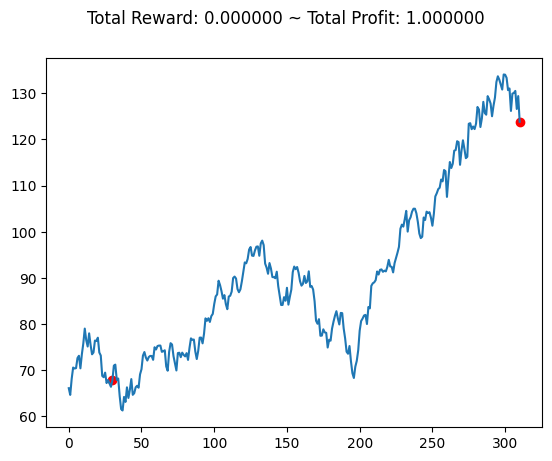

In [70]:
%matplotlib inline
import gym_anytrading
import gymnasium as gym
from gym_anytrading.envs import StocksEnv

import matplotlib.pyplot as plt

class CustomStocksEnv(StocksEnv):
    def render_all(self):
        # 凡例とマーカーサイズの調整を含むプロットを作成
        plt.figure(figsize=(15, 6))
        super().render_all()
        plt.legend(['Price', 'Buy', 'Sell'], markerscale=0.5)  # 凡例を追加
        plt.setp(plt.gca().get_lines(), markersize=2)  # マーカーサイズを調整


# 他にもデータ処理や可視化のために必要なライブラリをインポートします
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import yfinance as yf
from datetime import datetime

# CSVファイルから株価データを読み込みます
df = yf.download("SPXL",start='2023-01-01',end = datetime.now(),interval="1d")
print(df.head())

# `gym-anytrading`に必要なカラム名に変更します
# df['Date'] = pd.to_datetime(df['Date'])
# df.set_index('Date', inplace=True)

# Forex環境を構築しますが、株価予測にも同様に適用できます
# env = CustomStocksEnv(df=df, frame_bound=(30, len(df)), window_size=5)
env = gym.make('stocks-v0', df=df, frame_bound=(40, len(df)), window_size=30)

state = env.reset()
# 取引情報を格納するリストを初期化
trades = []
total_reward = 0  # 累積報酬を追跡するための変数

while True:
    next_state, reward, terminated, truncated, info = env.step(action)
    total_reward += reward  # 各ステップの報酬を累積
    print(f'next state:{next_state}')
    print(f'reward:{reward}')
    print(f'terminated:{terminated}')
    print(f'truncated:{truncated}')
    print(f'info:{info}')

    if truncated:
        print("truceted Info:", info)
        break
    if terminated :
        print("terminated Info:", info)#正常終了
        break
    if 'total_reward' in info:
      trades.append(info)

# 最終的な損益を出力
print(f"最終的な損益: {total_reward}")
# 取引の回数を出力
print(f"取引の回数: {len(trades)}")
print(f"trades:{trades}")
# plt.figure(figsize=(15, 6))
# plt.cla()
# plt.legend()
# env.reset()
env.render()
# env.render_all()
plt.show()



# another sample

[*********************100%%**********************]  1 of 1 completed


info: {'total_reward': -29.709991455078125, 'total_profit': 0.6038836958772885, 'position': <Positions.Long: 1>}


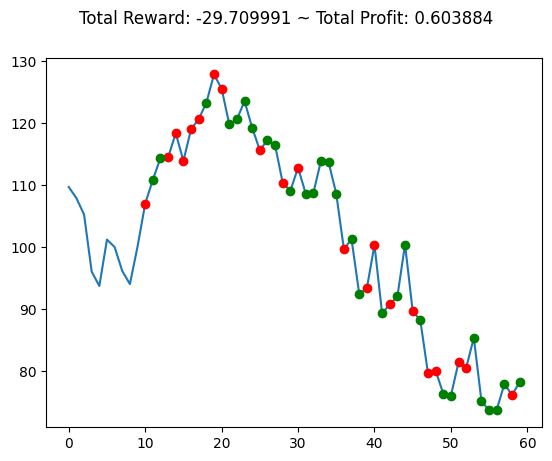

In [75]:
import numpy as np
import matplotlib.pyplot as plt

import gymnasium as gym
import gym_anytrading
from gym_anytrading.envs import TradingEnv, ForexEnv, StocksEnv, Actions, Positions
from gym_anytrading.datasets import FOREX_EURUSD_1H_ASK, STOCKS_GOOGL


df = yf.download("SPXL",start='2022-01-01',end = datetime.now(),interval="1d")
# env = gym.make('forex-v0', frame_bound=(50, 100), window_size=10)
env = gym.make('stocks-v0',df=df, frame_bound=(50, 100), window_size=10)

observation = env.reset(seed=2023)
while True:
    action = env.action_space.sample()
    observation, reward, terminated, truncated, info = env.step(action)
    done = terminated or truncated

    # env.render()
    if done:
        print("info:", info)
        break

plt.cla()
env.unwrapped.render_all()
plt.show()

# PPO

## pip

In [1]:
!pip install gym-anytrading
!pip install yfinance
!pip install 'stable-baselines3[extra]'
# !pip install stable-baselines3
# !pip install torch
!pip install gym-trading-env

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 172.2/172.2 kB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 953.9/953.9 kB 10.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 182.1/182.1 kB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 434.7/434.7 kB 7.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 23.2 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_c

## code

In [8]:
import gym_anytrading
from stable_baselines3 import PPO
from stable_baselines3.common.vec_env import DummyVecEnv
import yfinance as yf
from datetime import datetime
import matplotlib.pyplot as plt
# gymnasiumをインポート（gymの代わりに）
import gymnasium as gym

# from tqdm import tqdm
# import random

# import numpy as np
# import pandas as pd
# import seaborn as sns

# from stable_baselines3.common.env_util import make_vec_env
# from stable_baselines3 import A2C  # A2Cをインポート

# import matplotlib.dates as mdates

# import gym_trading_env
# import sys


# 株価データの取得
df = yf.download("SPXL", start='2024-01-01', end=datetime.now(), interval="1d")
print(df.head())
print("*"*10)
r,c=df.shape
print(r,c)
print(f'len:{len(df)}')
# TradingEnv環境の作成

# TradingEnv環境の作成
# Dataframeの列名を小文字に変換
# df.rename(columns=lambda x: x.strip().lower(), inplace=True)
# env = gym.make('TradingEnv', df=df)
# env = gym.make('TradingEnv', df=df, frame_bound=(10, len(df)), window_size=5)
env = gym.make('stocks-v0', df=df, frame_bound=(10, len(df)), window_size=5)
env = DummyVecEnv([lambda: env])  # ベクトル化された環境の作成
# 環境の作成
# Parallel environments
# PPOモデルの作成
# model = A2C("MlpPolicy", env, verbose=1)

model = PPO("MlpPolicy", env, verbose=1)

# 学習の実行
model.learn(total_timesteps=100)

# 学習したモデルを使用して予測
# obs = env.reset()
# GymのAPIを使用している場合
# obs, info = env.reset()

# trades=[]
# while True:
#     action, _states = model.predict(obs, deterministic=True)
#     obs, rewards, done, info = env.step(action)  # 'terminated' と 'truncated' を 'done' に置き換える
#     # result = env.step(action)  # 'terminated' と 'truncated' を 'done' に置き換える
#     # # print(f'_states:{_states}')
#     # # print(f'obs{obs}')
#     # print(f'rewards{rewards}')
#     # print(f'done{done}')
#     # print(f'info{info}')
#     trades.append(info)
#     if done:  # 'terminated or truncated' を 'done' に置き換える
#         print("info:", info)
#         # At the end of the episode you want to render
#         # env.save_for_render(dir = "render_logs")
#         break

# # from gym_trading_env.renderer import renderer
# # renderer = renderer(render_logs_dir="render_logs")
# # renderer.run()


# print(f'*****trade:')
# print(f'len trades:{len(trades)}')
# for i in trades:
#   print(i)

# dfを修正
# 必要なライブラリをインポート
import pandas as pd

# エージェントの行動と環境の状態を記録するためのリストを初期化
actions = []
rewards = []
dones = []
infos = []

# エージェントが環境と対話するプロセスをシミュレート
obs = env.reset()
while True:
    action, _states = model.predict(obs, deterministic=True)
    obs, reward, done, info = env.step(action)

    # 各ステップの情報をリストに追加
    actions.append(action)
    rewards.append(reward)
    dones.append(done)
    infos.append(info)

    # エピソードが終了したらループを抜ける
    if done:
        break

# frame_boundの開始インデックスを考慮して、情報をデータフレームに追加
start_index = env.frame_bound[0] - env.window_size
for i, (action, reward, done, info) in enumerate(zip(actions, rewards, dones, infos), start=start_index):
    df.loc[i, 'Action'] = action
    df.loc[i, 'Reward'] = reward
    df.loc[i, 'Done'] = done
    df.loc[i, 'Info'] = info

# 結合されたデータフレームを表示
print(df[start_index:env.frame_bound[1]])



# 株価データと取引情報をプロットする関数
def plot_stock_trades(df, trades):
    # 新しい図を作成
    plt.figure(figsize=(14, 7))

    # 株価の終値をプロット
    plt.plot(df.index, df['Close'], label='Close Price')

    # 取引タイミングをプロット
    for trade in trades:
        if trade['action'] == 1:  # 仮に1が買いを示すとする
            plt.scatter(trade['date'], trade['price'], color='green', label='Buy')
        elif trade['action'] == 0:  # 仮に0が売りを示すとする
            plt.scatter(trade['date'], trade['price'], color='red', label='Sell')

    # X軸のフォーマットを日付に設定
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=30))  # 30日ごとに日付を表示

    # グラフのタイトルとラベルを設定
    plt.title('Stock Price and Trades')
    plt.xlabel('Date')
    plt.ylabel('Price')

    # 凡例を表示
    plt.legend()

    # グリッドを表示
    plt.grid(True)

    # グラフを表示
    plt.show()

# 株価データと取引情報を渡してグラフをプロット
plot_stock_trades(df, trades)



[*********************100%%**********************]  1 of 1 completed


                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2024-01-02  101.879997  102.839996  100.760002  102.120003  101.803108   
2024-01-03  100.699997  101.199997   99.250000   99.629997   99.320831   
2024-01-04   99.269997  100.930000   98.440002   98.629997   98.323936   
2024-01-05   98.650002  100.550003   98.000000   98.930000   98.623009   
2024-01-08   99.220001  103.230003   99.150002  103.099998  102.780067   

              Volume  
Date                  
2024-01-02   8732800  
2024-01-03  11632600  
2024-01-04   7422300  
2024-01-05  10963500  
2024-01-08   8596400  
**********
71 6
len:71
Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 60       |
|    ep_rew_mean     | 8.39     |
| time/              |          |
|    fps             | 769      |

ValueError: You have passed a tuple to the predict() function instead of a Numpy array or a Dict. You are probably mixing Gym API with SB3 VecEnv API: `obs, info = env.reset()` (Gym) vs `obs = vec_env.reset()` (SB3 VecEnv). See related issue https://github.com/DLR-RM/stable-baselines3/issues/1694 and documentation for more information: https://stable-baselines3.readthedocs.io/en/master/guide/vec_envs.html#vecenv-api-vs-gym-api

### 修正

[*********************100%%**********************]  1 of 1 completed


                 Open       High        Low      Close  Adj Close    Volume
Date                                                                       
2023-01-03  63.029999  64.040001  59.880001  61.360001  60.427792  18048500
2023-01-04  62.439999  63.750000  60.900002  62.709999  61.757282  17139400
2023-01-05  61.689999  61.740002  60.250000  60.529999  59.610401  15680900
2023-01-06  62.049999  65.220001  60.529999  64.639999  63.657967  18489900
2023-01-09  65.800003  67.449997  64.440002  64.559998  63.579178  11824200
**********
321 6
len:321
Using cpu device
-----------------------------
| time/              |      |
|    fps             | 1016 |
|    iterations      | 1    |
|    time_elapsed    | 2    |
|    total_timesteps | 2048 |
-----------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 682         |
|    iterations           | 2           |
|    time_elapsed         | 5           |
|    t

/usr/local/lib/python3.10/dist-packages/gymnasium/core.py:311: UserWarning: WARN: env.frame_bound to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.frame_bound` for environment variables or `env.get_wrapper_attr('frame_bound')` that will search the reminding wrappers.
  logger.warn(
/usr/local/lib/python3.10/dist-packages/gymnasium/core.py:311: UserWarning: WARN: env.window_size to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.window_size` for environment variables or `env.get_wrapper_attr('window_size')` that will search the reminding wrappers.
  logger.warn(
/usr/local/lib/python3.10/dist-packages/gymnasium/core.py:311: UserWarning: WARN: env.frame_bound to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.frame_bound` for environment variables or `env.get_wr

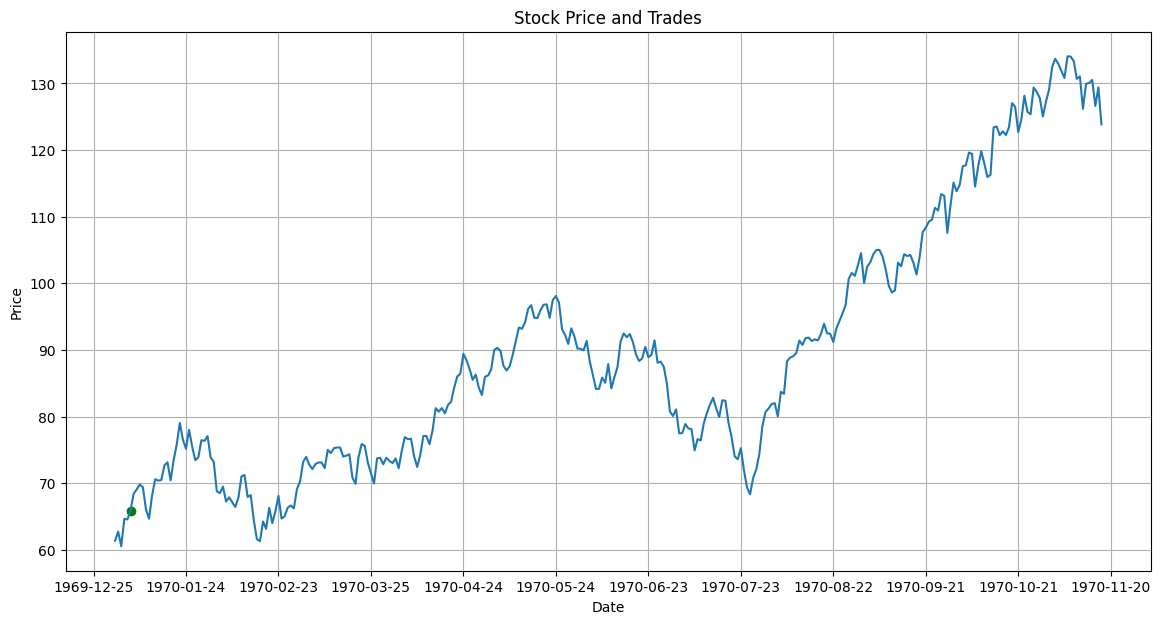

In [21]:
import gymnasium as gym
from stable_baselines3 import PPO
from stable_baselines3.common.vec_env import DummyVecEnv
import yfinance as yf
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd

# 株価データの取得
df = yf.download("SPXL", start='2023-01-01', end=datetime.now(), interval="1d")
print(df.head())
print("*" * 10)
r, c = df.shape
print(r, c)
print(f'len:{len(df)}')

# TradingEnv環境の作成
env = gym.make('stocks-v0', df=df, frame_bound=(10, len(df)), window_size=5)
env = DummyVecEnv([lambda: env])  # ベクトル化された環境の作成

# PPOモデルの作成
model = PPO("MlpPolicy", env, verbose=1)

# 学習の実行
model.learn(total_timesteps=10000)

# エージェントの行動と環境の状態を記録するためのリストを初期化
actions = []
rewards = []
dones = []
infos = []

# エージェントが環境と対話するプロセスをシミュレート
obs = env.reset()
epi_count=0
while True:
    action, _states = model.predict(obs, deterministic=True)
    obs, reward, done, info = env.step(action)


    # エピソードが終了したらループを抜ける
    if done:
      epi_count+=1
      print(f'*end episode:{epi_count}')
      # 各ステップの情報をリストに追加
      actions.append(action)
      rewards.append(reward)
      dones.append(done)
      infos.append(info)
      break

# frame_boundの開始インデックスを考慮して、情報をデータフレームに追加
start_index = env.envs[0].frame_bound[0] - env.envs[0].window_size
# dfのインデックスをリセット
df.reset_index(inplace=True)

for i, (action, reward, done, info) in enumerate(zip(actions, rewards, dones, infos), start=start_index):
    # dfのインデックス範囲内にあることを確認
    if i < len(df):
        df.loc[i, 'Action'] = action
        df.loc[i, 'Reward'] = reward
        df.loc[i, 'Done'] = done
        df.loc[i, 'Info'] = str(info)  # infoが辞書の場合、文字列に変換
    else:
        break  # dfのインデックス範囲外の場合、ループを抜ける

# 結合されたデータフレームを表示
print(df[start_index:env.envs[0].frame_bound[1]])

# 株価データと取引情報をプロットする関数
def plot_stock_trades(df):
    # 新しい図を作成
    plt.figure(figsize=(14, 7))

    # 株価の終値をプロット
    plt.plot(df.index, df['Close'], label='Close Price')

    # 取引タイミングをプロット
    for i, row in df.iterrows():
        if row['Action'] == 1:  # 仮に1が買いを示すとする
            plt.scatter(row.name, row['Close'], color='green', label='Buy')
        elif row['Action'] == 0:  # 仮に0が売りを示すとする
            plt.scatter(row.name, row['Close'], color='red', label='Sell')

    # X軸のフォーマットを日付に設定
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=30))  # 30日ごとに日付を表示

    # グラフのタイトルとラベルを設定
    plt.title('Stock Price and Trades')
    plt.xlabel('Date')
    plt.ylabel('Price')

    # 凡例を表示
    # plt.legend()

    # グリッドを表示
    plt.grid(True)

    # グラフを表示
    plt.show()

# 株価データと取引情報を渡してグラフをプロット
plot_stock_trades(df)
